# LAB 3 - NAIVE BAYES - (6.01.25)

## AIM
To apply **Naive Bayes** to the Load Wine Dataset is to classify wine samples based on their chemical properties (e.g., alcohol content, malic acid, ash, etc.) into distinct wine categories and evaluate the model's perfomance using `classification_report`.

## ALGORITHM

1. **Load Data:**
   - Load the Wine dataset (features `X` and target labels `y`).
   -  Visualise the dataset using `Dat

2. **Visualise and Check for normalization**
   - Plot histograms for each column of the dataset and verify whether they follow a normal distribution.

3. **Split Data:**
   - Split the dataset into training and testing sets (e.g., 70% training, 30% testing).

4. **Train a Gaussian Naive Bayes Model:**
   - Create a `GaussianNB` model.
   - Fit the model on the training data.

5. **Make Predictions:**
   - Predict labels for the test set using the trained model.

6. **Evaluate Model:**
   - Print classification report: `classification_report(y_test, y_pred)`, from which evaluation metrics like precision,recall, and accuracy are returned.

## DESCRIPTION

Gaussian Naive Bayes is a variant of the Naive Bayes classifier that assumes the features follow a normal (Gaussian) distribution. It calculates the probability of a data point belonging to a particular class based on the likelihood of each feature given the class, using the mean and variance of the features for each class. Despite its simplicity and the strong assumption of feature independence, it often performs well, particularly when the data is normally distributed or close to it. It's fast, easy to implement, and works well with large datasets.

## CODE AND OUTPUT

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

In [3]:
df = pd.DataFrame(load_wine()['data'],columns=load_wine()['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

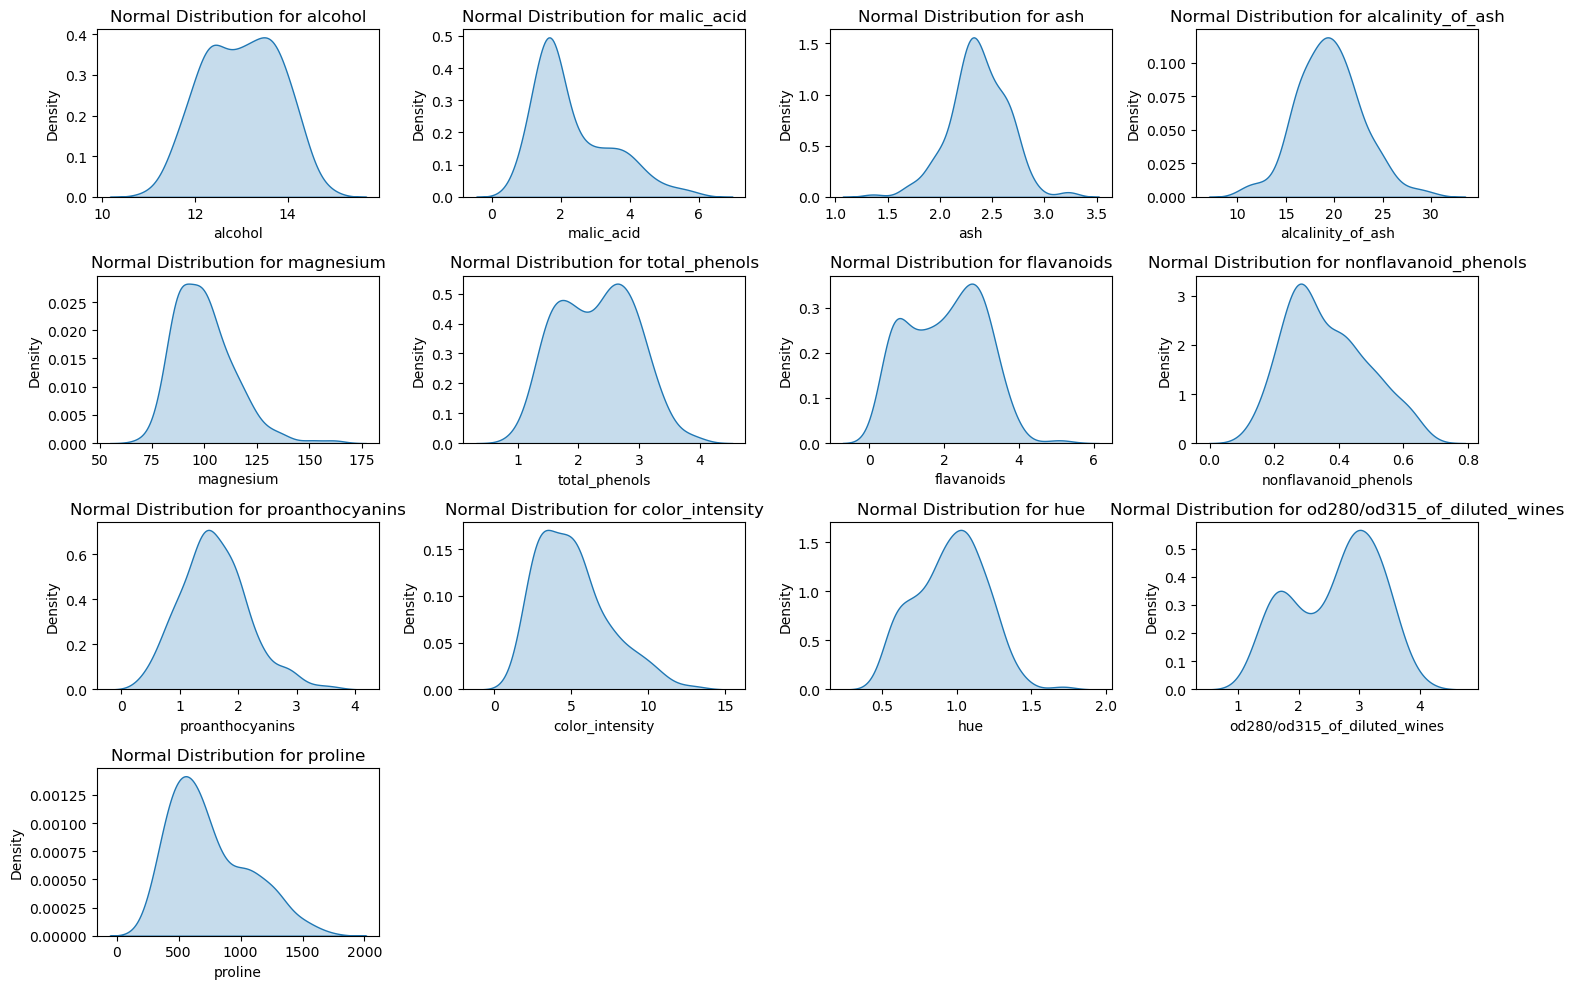

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1) 
    sns.kdeplot(df[column], fill=True)
    plt.title(f"Normal Distribution for {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [4]:
X,y = load_wine(return_X_y=True)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## RESULT

A Gaussian Naive Bayes classifier has been trained on the wine dataset with an accuracy of 98%.